In [3]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
data = pd.read_csv("C:/Users/black/Downloads/starbucks.csv")

In [5]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [6]:
data.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

In [7]:
data.describe()

,Calories,Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000
mean,193.871901,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512
std,102.863303,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000
50%,185.000000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000
75%,260.000000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000
max,510.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000


Processing the data

In [8]:
data.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [9]:
# Define a function to count duplicates
def count_deplicates(data):
    return data.duplicated().sum()
# Define a function to remove duplicates
def remove_duplicates(data):
    return data.drop_duplicates()
total_duplicates = count_deplicates(data)
print(f"Total number of duplicates: {total_duplicates}")

your_dataframe_no_duplicates = remove_duplicates(data)

Total number of duplicates: 0


In [10]:
data.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [11]:
# List all column name in the DataFrame
all_columns = data.columns.to_list()
print(all_columns)

['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)', ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)']


In [12]:
# Create a copy of the DataFrame
Beverage_Analysis = data.copy()

In [13]:
# Convert the 'Vitamin A (% DV)' column to numeric, removing the '%' symbol
Beverage_Analysis['Vitamin A (% DV) '] = Beverage_Analysis['Vitamin A (% DV) '].str.rstrip('%').astype('float') /100.0
# Display the updated DataFrame
print(Beverage_Analysis)

              Beverage_category                                      Beverage  \
0                        Coffee                                 Brewed Coffee   
1                        Coffee                                 Brewed Coffee   
2                        Coffee                                 Brewed Coffee   
3                        Coffee                                 Brewed Coffee   
4       Classic Espresso Drinks                                   Caffè Latte   
..                          ...                                           ...   
237  Frappuccino® Blended Crème  Strawberries & Crème (Without Whipped Cream)   
238  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
239  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
240  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   
241  Frappuccino® Blended Crème          Vanilla Bean (Without Whipped Cream)   

          Beverage_prep  Ca

In [15]:
# Convert the column to numeric, coercing errors to NaN
Beverage_Analysis[' Total Fat (g)'] = pd.to_numeric(Beverage_Analysis[' Total Fat (g)'], errors='coerce')

In [16]:
Beverage_Analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             241 non-null    float64
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    float64

In [17]:
# Find the beverage with the most calories
most_calories_beverage = Beverage_Analysis.loc[Beverage_Analysis['Calories'].idxmax()]

# Find the beverae with the most calories
least_calories_beverage = Beverage_Analysis.loc[Beverage_Analysis['Calories'].idxmin()]

# Print the result
print(f"Beverage with the most calories: {most_calories_beverage['Beverage']} - {most_calories_beverage['Calories']} calories")
print(f"Beverage with the least calories: {least_calories_beverage['Beverage']} - {least_calories_beverage['Calories']} calories")

Beverage with the most calories: White Chocolate Mocha (Without Whipped Cream) - 510 calories
Beverage with the least calories: Tazo® Tea - 0 calories


Visualization 

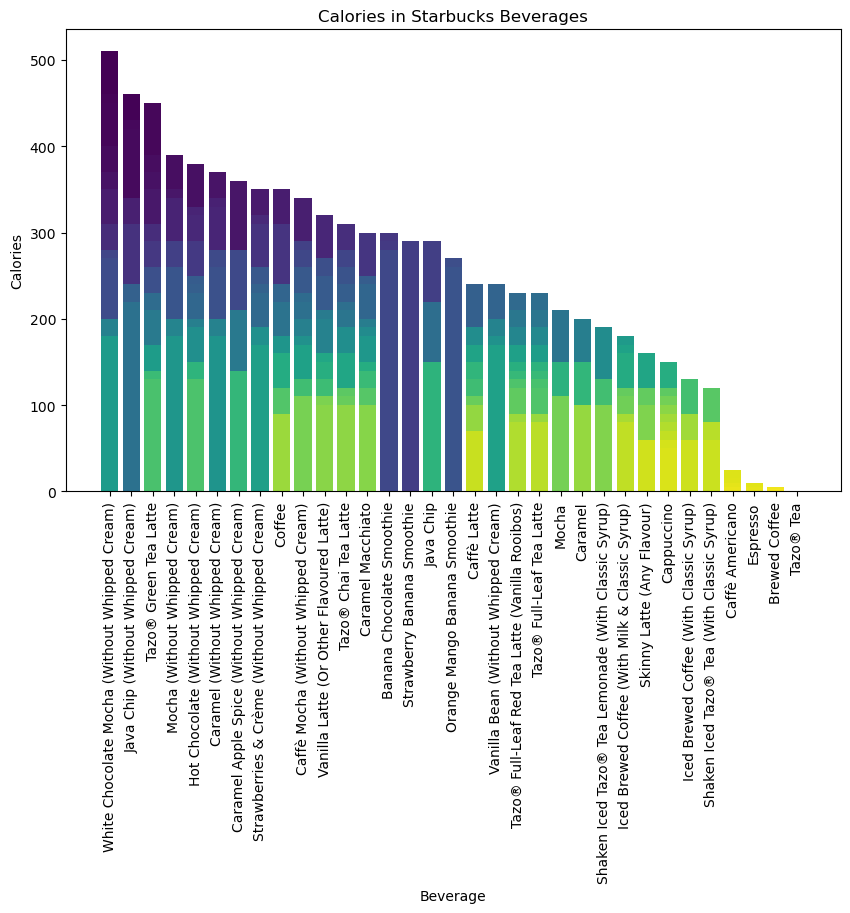

In [18]:
# Sort the DataFrame by calories for better visualization
sorted_data = Beverage_Analysis.sort_values(by='Calories', ascending=False)

# Assign a different color to each beverage using visualization colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_data)))

# Create a bar chart with different colors for each beverage
plt.figure(figsize=(10, 6))
plt.bar(sorted_data['Beverage'], sorted_data['Calories'],
color=colors)
plt.xticks(rotation=90)
plt.xlabel('Beverage')
plt.ylabel('Calories')
plt.title('Calories in Starbucks Beverages')
plt.show()

Top 3 Beverage Preparations with the Most Calorie

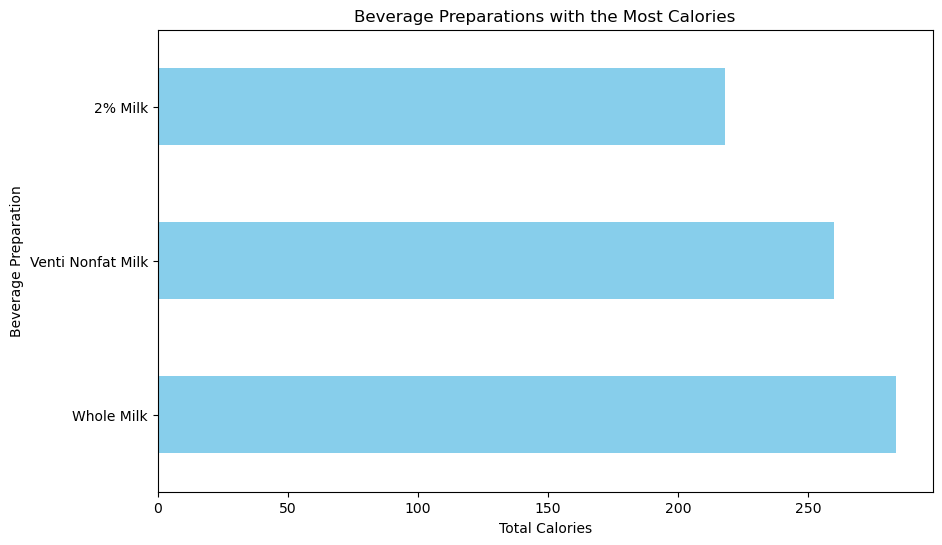

In [19]:
# Group by Beverage prep and find the total calories for each prep
prep_calories = Beverage_Analysis.groupby('Beverage_prep')['Calories'].mean()

# Sort the values to get the top 3
top3_prep_calories = prep_calories.sort_values(ascending=False).head(3)

# Create a horizontal bar chart for the top 3 Beverage Preps
plt.figure(figsize=(10,6))
top3_prep_calories.plot(kind='barh', color='skyblue')
plt.xlabel('Total Calories')
plt.ylabel('Beverage Preparation')
plt.title('Beverage Preparations with the Most Calories')
plt.show()

Average Sugar in Starbucks Beverage

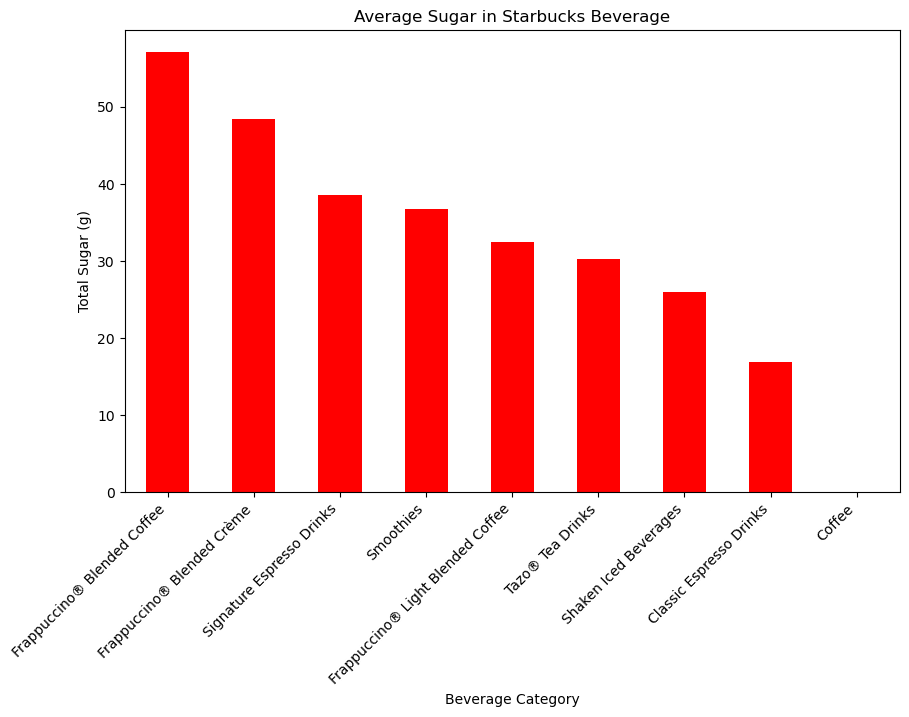

In [21]:
# Group by beverage category and find the total sugar for each category
category_sugar = Beverage_Analysis.groupby('Beverage_category')[' Sugars (g)'].mean()

# Sort the values to get a clear view
sorted_category_sugar = category_sugar.sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10,6))
sorted_category_sugar.plot(kind='bar', color='red')
plt.xlabel('Beverage Category')
plt.ylabel('Total Sugar (g)')
plt.title('Average Sugar in Starbucks Beverage')
plt.xticks(rotation=45, ha='right') # rotate x-axis label for better visibility
plt.show()

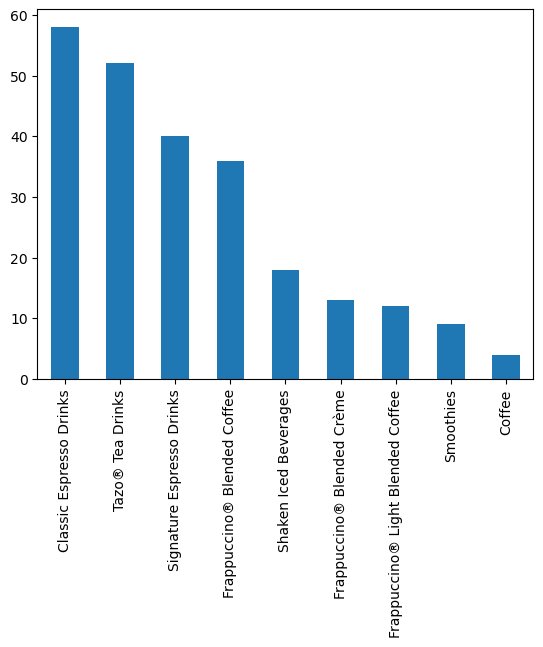

In [22]:
data['Beverage_category'].value_counts().plot(kind='bar')
plt.show()

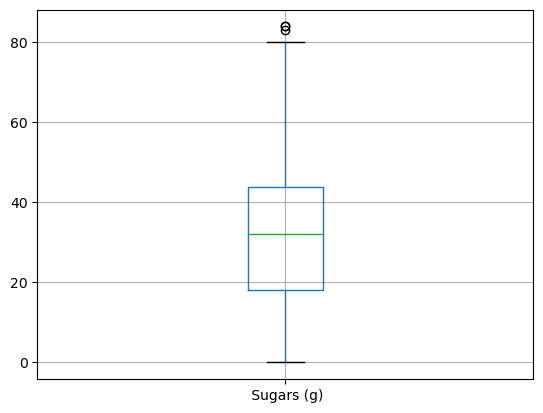

In [23]:
data.boxplot(column=[' Sugars (g)'])
plt.show()

In [25]:
# Print the list of columns in the DataFrame
print(data.columns)

# Use str.contains() to find columns containing 'Total Fat'
matching_columns = data.columns[data.columns.str.contains('Total Fat')]

# Print matching columns
print(matching_columns)

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')
Index([' Total Fat (g)'], dtype='object')


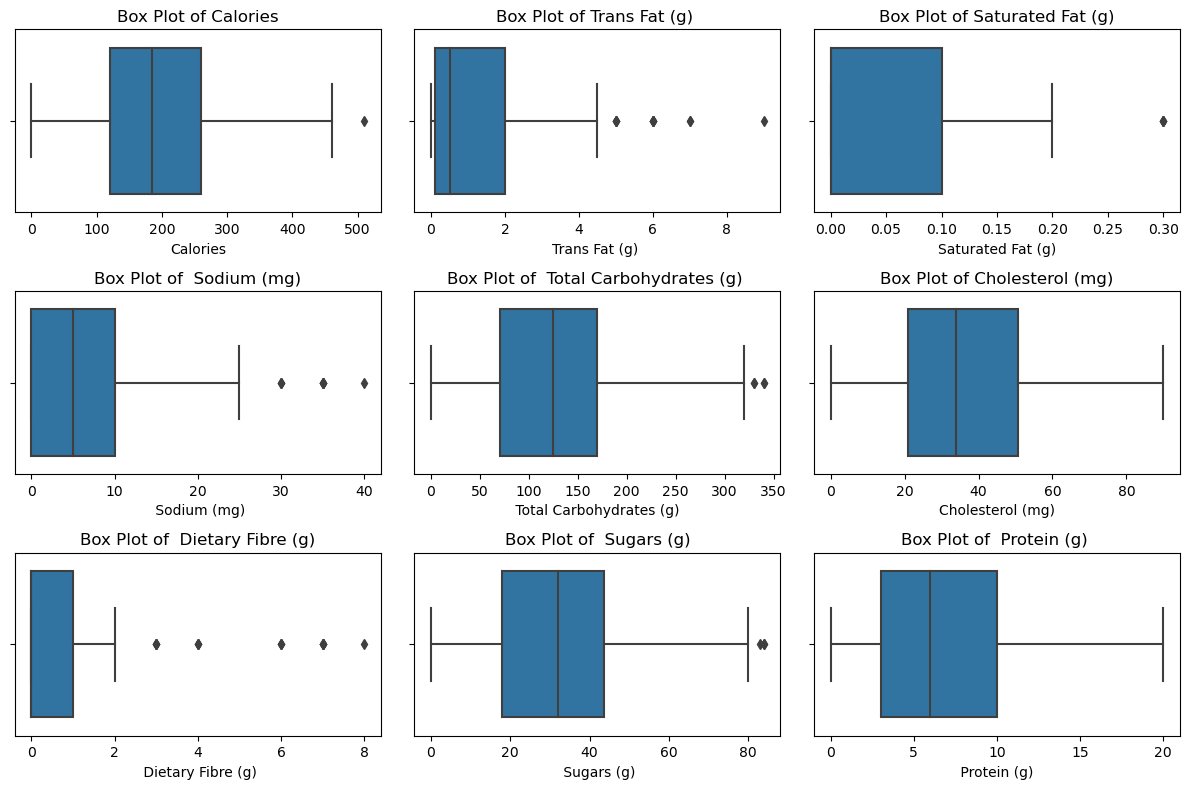

In [30]:
numeric_columns = [
    'Calories', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
    ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)', ' Sugars (g)', ' Protein (g) '
]

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))
for column in numeric_columns:
    plt.subplot(3, 3, numeric_columns.index(column) + 1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

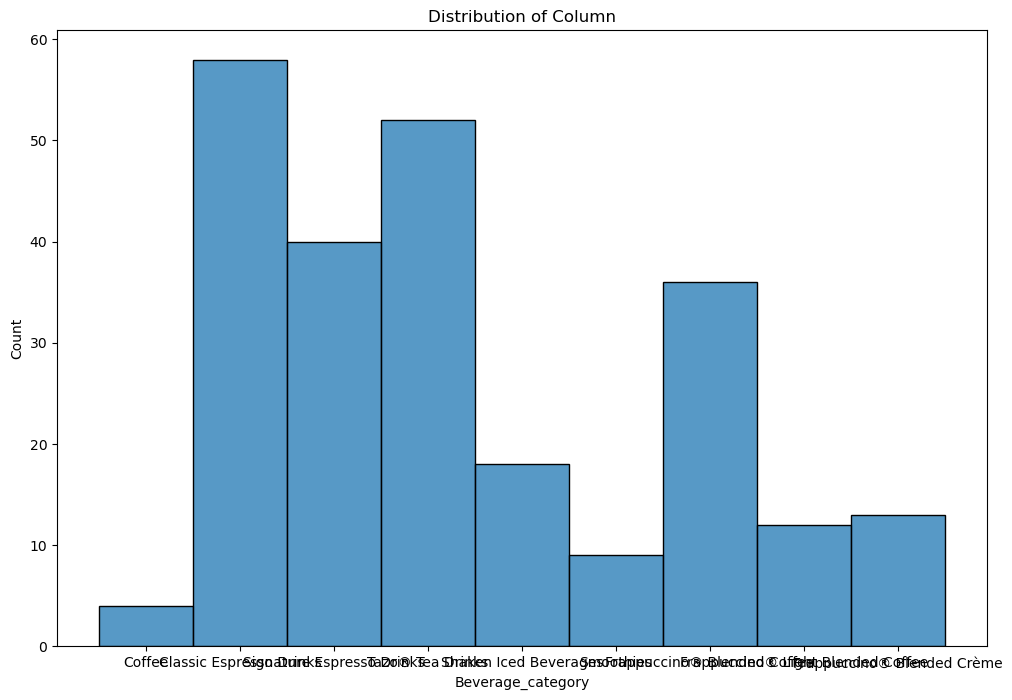

In [31]:
# Visualize the distribution of numerical columns
plt.figure(figsize=(12, 8))
sns.histplot(data['Beverage_category'])
plt.title('Distribution of Column')
plt.show()

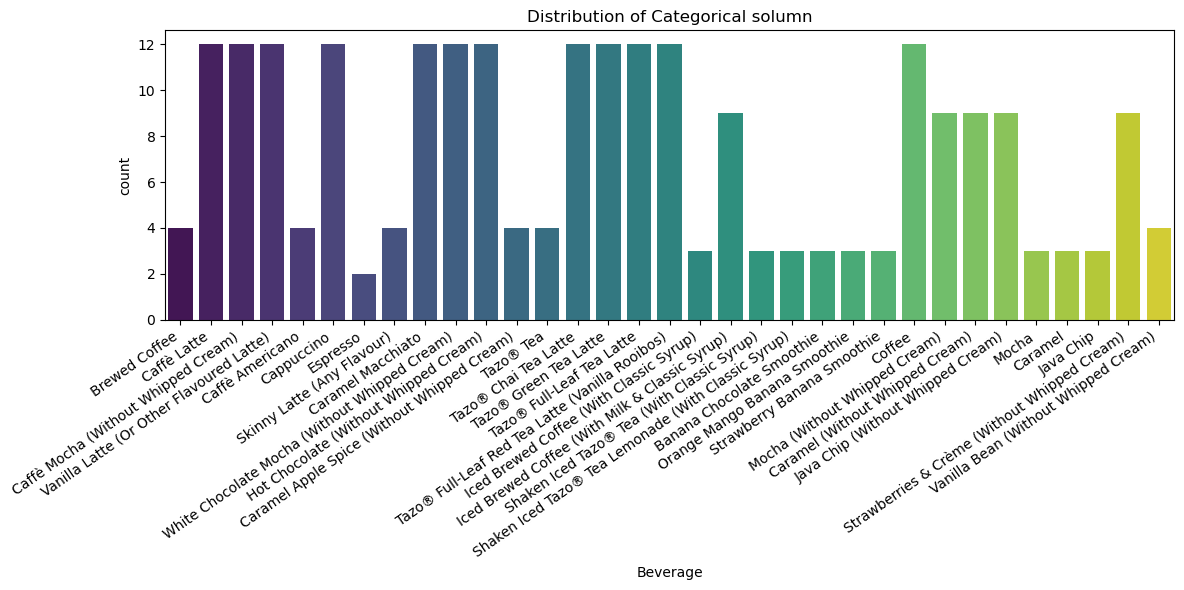

In [34]:
# Assuming data is your DataFrame and 'Beverage' is in the categorical column
plt.figure(figsize=(12,6))

# Create a countplot with rotated x-axis labels
sns.countplot(x='Beverage', data=data, palette='viridis')
plt.title('Distribution of Categorical solumn')
plt.xticks(rotation=35, ha='right', fontsize=10) # rotate and adjust font size
plt.tight_layout() # Ensure tight layout to prevent label overlapping
plt.show()

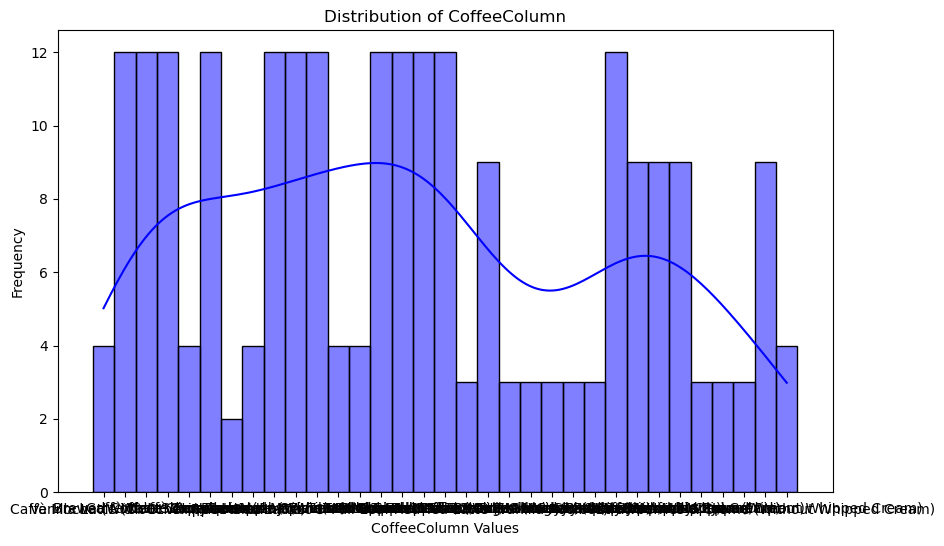

In [35]:
# Assuming data is your DataFrame and 'CoffeeColumn' is the column you want to visualize
plt.figure(figsize=(10,6))
sns.histplot(data['Beverage'], bins=20, kde=True, color='blue')
plt.title('Distribution of CoffeeColumn')
plt.xlabel('CoffeeColumn Values')
plt.ylabel('Frequency')
plt.show()

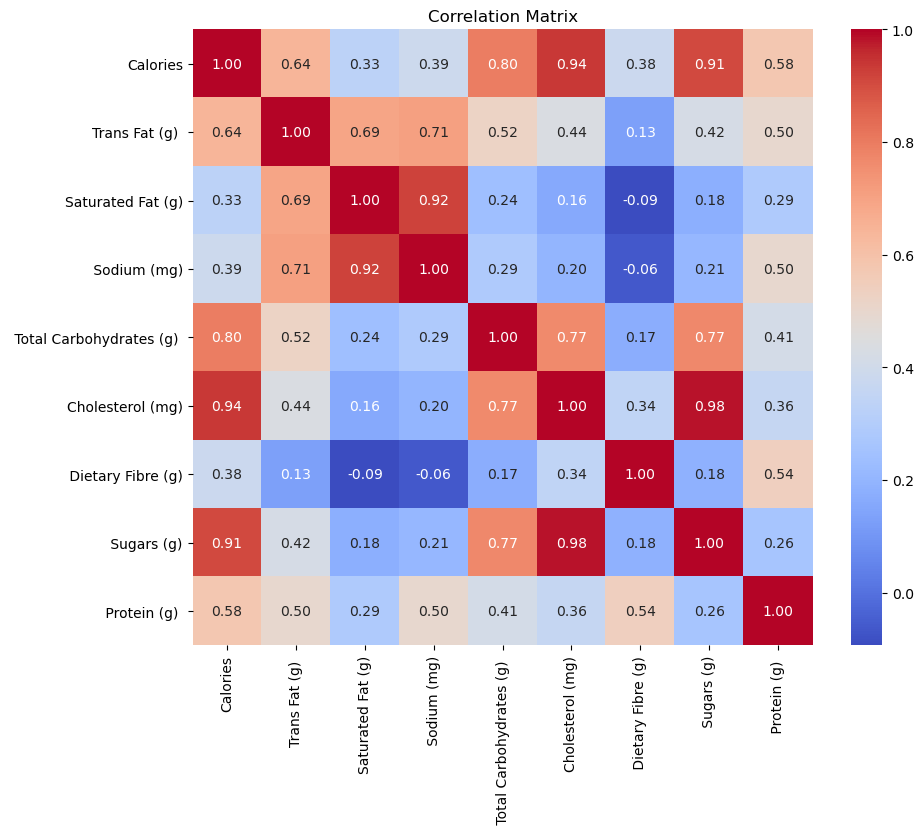

In [36]:
numeric_columns = data.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()